This notebook analyzes the results from a run of the short c5g7 examples with a small mesh to determine the optimal parameters for the multilevel preconditioner when using RQI.

The parameters that were varied were the following:

* 'subspace_size' : [50, 100, 150],
* 'num_v_cycles'  : [1, 2, 3],
* 'num_relax'     : [1, 2, 3],
* 'relax_weight'  : [0.8, 1.0, 1.2]

First let's pull out the solve time which is in the hdf5 output under the timers: omnibus::Denovo_Manager_Base.solve

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import os

%matplotlib inline

Grab the max solve time over all processors for each case

In [11]:
# Printing out the cases that exceeded the walltime
solve_times = {}
for dir in glob.glob("../results/*"):
    d = os.path.basename(dir)
    output = '{}/c5g7_small.out.h5'.format(dir)
    with h5.File(str(output), 'r') as f:
        if 'denovo' in f.keys():
            solve_times[d] = f['denovo']['timers'][-1][1]
        else:
            print(d)

rayleigh_quotient-ss050-vcyc01-r01-rwt0.8
rayleigh_quotient-ss050-vcyc01-r01-rwt1.0
rayleigh_quotient-ss150-vcyc01-r01-rwt0.8


In [25]:
subspace = ['050', '100', '150']
vcyc = ['1', '2', '3']
relax = ['1', '2', '3']
relaxwt = ['0.8', '1.0', '1.2']
data = np.zeros((3,3,3,3))
for k,v in solve_times.iteritems():
    c = k.split('-')
    ss = c[1].strip('ss')
    vc = c[2].strip('vcyc0')
    rn = c[3].strip('r0')
    rwt = c[4].strip('rwt')
    ssi = subspace.index(ss)
    vci = vcyc.index(vc)
    rni = relax.index(rn)
    rwti = relaxwt.index(rwt)
    data[ssi, vci, rni, rwti] = v

In [30]:
# Subspace 150, relax weight 1.0
data[2,:,:,1]
# vcycle = 1,2,3: relaxations = 1,2,3

array([[ 28323.648066,  17959.02994 ,  19002.059891],
       [ 20229.864674,  23413.700164,  24564.974064],
       [ 22812.123063,  25465.919206,  27970.129496]])

In [31]:
# Subspace 150, relax weight 1.2
data[2,:,:,2]

array([[ 16385.890967,  16018.364849,  17272.216046],
       [ 18431.180447,  19994.510145,  21894.844287],
       [ 21065.52182 ,  22796.258548,  25737.581029]])

In [32]:
# Make things pretty (find the minimum time)
import pandas as pd

In [34]:
df = pd.DataFrame(data[2,:,:,2], columns=relax, index=vcyc)

,1,2,3
1,16385.890967,16018.364849,17272.216046
2,18431.180447,19994.510145,21894.844287
3,21065.521820,22796.258548,25737.581029


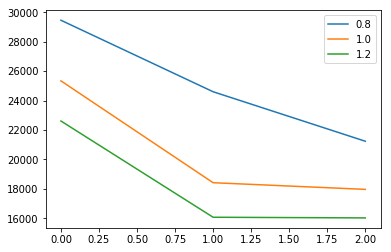

In [43]:
plt.plot(data[:,0,1,0], label='0.8')
plt.plot(data[:,0,1,1], label='1.0')
plt.plot(data[:,0,1,2], label='1.2')
plt.legend()